<a href="https://colab.research.google.com/github/Menna0Ameen/Advanced-Neural-Network-Q-Learning-project-/blob/main/Advanced_neuralnetwork2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation


In [47]:
class GridWorld:
    def __init__(self):
        self.size = 4
        self.goal = (3, 3)
        self.reset()

    def reset(self):
        self.pos = (0, 0)
        return self.pos

    def step(self, action):
        x, y = self.pos
        if action == 0:    # Up
            x = max(0, x - 1)
        elif action == 1:  # Right
            y = min(self.size - 1, y + 1)
        elif action == 2:  # Down
            x = min(self.size - 1, x + 1)
        elif action == 3:  # Left
            y = max(0, y - 1)

        next_pos = (x, y)
        reward = -1
        done = False

        if next_pos == self.goal:
            reward = 10
            done = True

        self.pos = next_pos
        return next_pos, reward, done


In [48]:
# Simulate a random agent before training (exploration only)
def run_random_agent(env, max_steps=50):
    state = env.reset()
    path = [state]
    for _ in range(max_steps):
        action = random.randint(0, 3)  # Random action
        next_state, reward, done = env.step(action)
        path.append(next_state)
        if done:
            break
        state = next_state
    return path

# Print agent path before learning
random_path = run_random_agent(GridWorld())
print("Agent Path BEFORE Training (Random):")
print(random_path)



Agent Path BEFORE Training (Random):
[(0, 0), (0, 1), (0, 1), (1, 1), (0, 1), (0, 2), (0, 3), (0, 2), (0, 1), (0, 2), (0, 2), (0, 3), (0, 2), (0, 3), (0, 2), (0, 2), (0, 1), (1, 1), (2, 1), (3, 1), (3, 0), (3, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 1), (2, 2), (2, 1), (3, 1), (3, 0), (3, 1), (3, 0), (3, 1), (3, 2), (3, 1), (2, 1), (2, 0), (2, 1), (1, 1), (1, 0), (0, 0), (1, 0), (2, 0), (2, 0), (2, 0), (1, 0), (1, 1), (0, 1), (1, 1), (0, 1)]


In [49]:
#CASE1

env = GridWorld()
q_table = np.zeros((16, 4))

alpha = 0.1
gamma = 0.9
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.995

episodes = 1000
max_steps = 50

def state_to_index(state):
    return state[0] * 4 + state[1]

for episode in range(episodes):   #repeat the training for a number of episodes (1000)
    state = env.reset()           #Start fresh at position (0, 0).
    for step in range(max_steps):  # move the agent step by step, up to 50 <-- (max steps)moves per episode (to avoid infinite loops).
        s_idx = state_to_index(state) # access the correct row in the Q-table.
        if random.uniform(0, 1) < epsilon:  #Use epsilon-greedy strategy to balance:
            action = random.randint(0, 3)  #Exploring new paths (random
        else:
            action = np.argmax(q_table[s_idx]) # Exploiting the best known path (choose max Q)

        next_state, reward, done = env.step(action)
        ns_idx = state_to_index(next_state)  #Convert new state to index

        q_table[s_idx, action] += alpha * (reward + gamma * np.max(q_table[ns_idx]) - q_table[s_idx, action])
        state = next_state

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay) #Slowly explore less, and exploit more as agent gets smarter


In [50]:
print(q_table)

[[ 0.53844228  1.47834126  1.8098      0.44004721]
 [-0.79768497  1.54637203  3.11153704 -1.25100969]
 [ 0.84695803  1.21048193  4.10604446 -1.28731505]
 [ 1.62779349  0.42378833  5.87555821  0.07485883]
 [ 0.58072602  3.122       2.89939718  1.66636566]
 [ 1.60316869  4.50617481  4.58        1.71085001]
 [ 0.93714348  6.19894482  4.85612904  1.31863346]
 [ 3.57170433  5.71734852  7.99986231  3.7350047 ]
 [-0.46215996  4.56784312  0.87611433  0.80010965]
 [ 3.03235938  6.2         6.06950759  2.69632409]
 [ 4.51232595  7.91124745  8.          4.50348468]
 [ 5.79174015  7.60308554  9.99999402  4.67587948]
 [-0.76679855  4.72584252 -1.017568   -0.33117065]
 [ 2.78573093  7.99828471  3.36634606  0.54085439]
 [ 6.15527803 10.          7.93676272  5.99998326]
 [ 0.          0.          0.          0.        ]]


In [51]:
action_symbols = {0: '↑', 1: '→', 2: '↓', 3: '←'}
env = GridWorld()

print("Learned Policy:\n")
for i in range(4):   #Loop over each cell in the 4×4 grid
    row = ""
    for j in range(4):
        state = i * 4 + j #convert (i,j)nto a flat number (from 0 to 15) to match Q-table index.
        if (i, j) == env.goal:
            row += " Goal  "
        else:
            best_action = np.argmax(q_table[state]) #Else, get the best action (the one with highest Q-value).
            row += f" {action_symbols[best_action]}  "
    print(row)


Learned Policy:

 ↓   ↓   ↓   ↓  
 →   ↓   →   ↓  
 →   →   ↓   ↓  
 →   →   →   Goal  


In [52]:
def get_policy_path(q_table, start=(0,0), goal=(3,3), max_steps=50):
    path = [start]
    state = start

    for _ in range(max_steps):
        idx = state[0]*4 + state[1]
        action = np.argmax(q_table[idx])

        x, y = state
        if action == 0:    # up
            x = max(0, x - 1)
        elif action == 1:  # right
            y = min(3, y + 1)
        elif action == 2:  # down
            x = min(3, x + 1)
        elif action == 3:  # left
            y = max(0, y - 1)

        new_state = (x, y)
        path.append(new_state)

        if new_state == goal:
            break

        state = new_state

    return path


In [53]:
final_policy_path = get_policy_path(q_table)
print("Final Policy Path:", final_policy_path)


Final Policy Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)]


In [54]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Final Policy Path(Q-learning)")

    # ✅ Draw all 4x4 grid boxes with coordinate labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            # ✅ Add label in center of each cell
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})",
                    ha='center', va='center', fontsize=10, color='gray')

    # ✅ Draw goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Red circle for agent
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


Final Policy Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)]


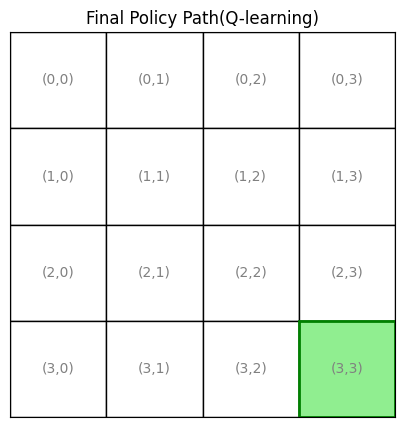

In [55]:
# After training
policy_path = get_policy_path(q_table)
print("Final Policy Path:", policy_path)

# Animate it
anim = animate_path(policy_path)
plt.show()


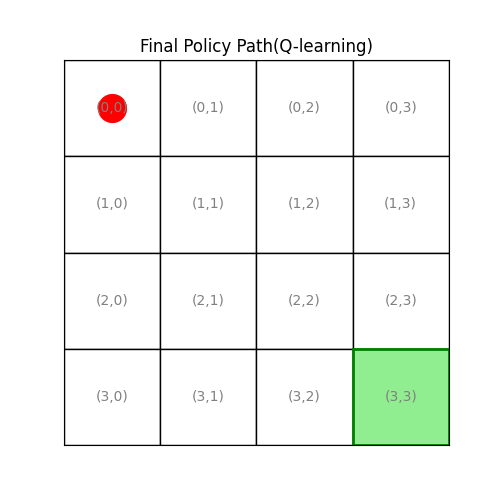

In [56]:
anim.save("Policy_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="Policy_path.gif")

In [57]:
#CASE2


env = GridWorld()
q_table = np.zeros((16, 4))

alpha = 0.5
gamma = 0.95
epsilon = 0.1
min_epsilon = 0.01
epsilon_decay = 0.995

episodes = 1000
max_steps = 50

def state_to_index(state):
    return state[0] * 4 + state[1]

for episode in range(episodes):
    state = env.reset()
    for step in range(max_steps):
        s_idx = state_to_index(state)
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 3)
        else:
            action = np.argmax(q_table[s_idx])

        next_state, reward, done = env.step(action)
        ns_idx = state_to_index(next_state)

        q_table[s_idx, action] += alpha * (reward + gamma * np.max(q_table[ns_idx]) - q_table[s_idx, action])
        state = next_state

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)


In [58]:
print(q_table)

[[ 1.33716388  2.20854999  3.21342812  2.01456985]
 [-0.84141753 -1.85971191  4.42908137 -2.25091211]
 [-1.23125    -1.35        0.78079468 -1.84451953]
 [-1.23125    -1.4628125  -1.35       -0.9875    ]
 [ 1.92624931  4.4351875   1.79049669  2.61836986]
 [ 3.01939199  4.46653769  5.72125     3.21128626]
 [-0.9875     -0.9875      7.06133894 -1.10625   ]
 [-0.9875     -0.9875      8.17266846 -0.9875    ]
 [-1.96252734 -1.35        5.46727423 -1.4628125 ]
 [ 4.42459316  7.075       4.75871658  3.11755208]
 [ 5.22859782  8.5         8.40385771  5.51160156]
 [ 5.32833557  8.359375   10.          5.30625   ]
 [-0.9875      7.03355227 -0.9875     -0.9875    ]
 [-0.7375      8.4979105   1.090625   -0.5       ]
 [ 3.2875      9.99999046  0.          1.340625  ]
 [ 0.          0.          0.          0.        ]]


In [59]:
action_symbols = {0: '↑', 1: '→', 2: '↓', 3: '←'}
env = GridWorld()

print("Learned Policy:\n")
for i in range(4):
    row = ""
    for j in range(4):
        state = i * 4 + j
        if (i, j) == env.goal:
            row += " Goal  "
        else:
            best_action = np.argmax(q_table[state])
            row += f" {action_symbols[best_action]}  "
    print(row)


Learned Policy:

 ↓   ↓   ↓   ←  
 →   ↓   ↓   ↓  
 ↓   →   →   ↓  
 →   →   →   Goal  


In [60]:
def get_policy_path(q_table, start=(0,0), goal=(3,3), max_steps=50):
    path = [start]
    state = start

    for _ in range(max_steps):
        idx = state[0]*4 + state[1]
        action = np.argmax(q_table[idx])

        x, y = state
        if action == 0:    # up
            x = max(0, x - 1)
        elif action == 1:  # right
            y = min(3, y + 1)
        elif action == 2:  # down
            x = min(3, x + 1)
        elif action == 3:  # left
            y = max(0, y - 1)

        new_state = (x, y)
        path.append(new_state)

        if new_state == goal:
            break

        state = new_state

    return path


In [61]:
final_policy_path = get_policy_path(q_table)
print("Final Policy Path:", final_policy_path)

Final Policy Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3)]


In [62]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Final Policy Path (Q-learning)")

    # ✅ Draw all 4x4 grid boxes with coordinate labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            # ✅ Add label in center of each cell
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})",
                    ha='center', va='center', fontsize=10, color='gray')

    # ✅ Draw goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Red circle for agent
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


Final Policy Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3)]


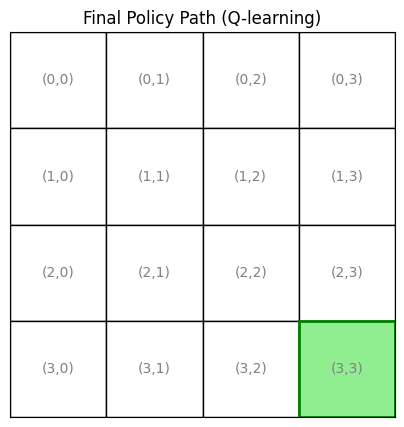

In [63]:
# After training
policy_path = get_policy_path(q_table)
print("Final Policy Path:", policy_path)

# Animate it
anim = animate_path(policy_path)
plt.show()

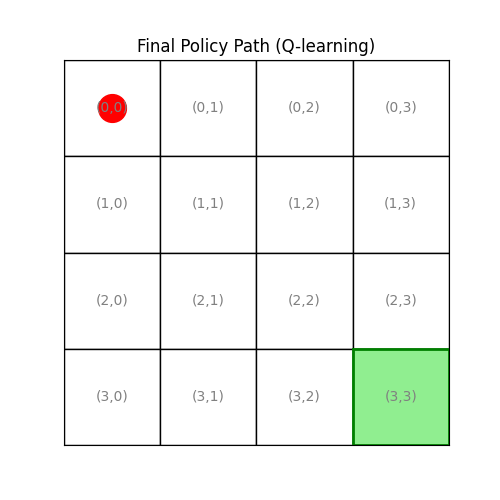

In [64]:
anim.save("Final Policy_Path.gif", writer="pillow")
from IPython.display import Image
Image(filename="Final Policy_Path.gif")

In [65]:
#CASE3

env = GridWorld()
q_table = np.zeros((16, 4))

alpha = 0.9
gamma = 0.99
epsilon = 0.5
min_epsilon = 0.5
epsilon_decay =1

episodes = 1000
max_steps = 50

def state_to_index(state):
    return state[0] * 4 + state[1]

for episode in range(episodes):
    state = env.reset()
    for step in range(max_steps):
        s_idx = state_to_index(state)
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 3)
        else:
            action = np.argmax(q_table[s_idx])

        next_state, reward, done = env.step(action)
        ns_idx = state_to_index(next_state)

        q_table[s_idx, action] += alpha * (reward + gamma * np.max(q_table[ns_idx]) - q_table[s_idx, action])
        state = next_state

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)


In [66]:
action_symbols = {0: '↑', 1: '→', 2: '↓', 3: '←'}
env = GridWorld()

print("Learned Policy:\n")
for i in range(4):
    row = ""
    for j in range(4):
        state = i * 4 + j
        if (i, j) == env.goal:
            row += " G  "
        else:
            best_action = np.argmax(q_table[state])
            row += f" {action_symbols[best_action]}  "
    print(row)


Learned Policy:

 →   →   →   ↓  
 →   →   →   ↓  
 →   →   →   ↓  
 →   →   →   G  


In [67]:
def get_policy_path(q_table, start=(0,0), goal=(3,3), max_steps=50):
    path = [start]
    state = start

    for _ in range(max_steps):
        idx = state[0]*4 + state[1]
        action = np.argmax(q_table[idx])

        x, y = state
        if action == 0:    # up
            x = max(0, x - 1)
        elif action == 1:  # right
            y = min(3, y + 1)
        elif action == 2:  # down
            x = min(3, x + 1)
        elif action == 3:  # left
            y = max(0, y - 1)

        new_state = (x, y)
        path.append(new_state)

        if new_state == goal:
            break

        state = new_state

    return path


In [68]:
print(q_table)

[[ 3.56281643  4.60890549  4.60890549  3.56281643]
 [ 4.60890549  5.6655611   5.6655611   3.56281643]
 [ 5.6655611   6.73289     6.73289     4.60890549]
 [ 6.73289     6.73289     7.811       5.6655611 ]
 [ 3.56281643  5.6655611   5.6655611   4.60890549]
 [ 4.60890549  6.73289     6.73289     4.60890549]
 [ 5.6655611   7.811       7.811       5.6655611 ]
 [ 6.73289     7.811       8.9         6.73289   ]
 [ 4.60890549  6.73289     6.73289     5.6655611 ]
 [ 5.6655611   7.811       7.811       5.6655611 ]
 [ 6.73289     8.9         8.9         6.73289   ]
 [ 7.811       8.9        10.          7.811     ]
 [ 5.6655611   7.811       6.73289     6.73289   ]
 [ 6.73289     8.9         7.811       6.73289   ]
 [ 7.811      10.          8.9         7.811     ]
 [ 0.          0.          0.          0.        ]]


In [69]:
final_policy_path = get_policy_path(q_table)
print("Final Policy Path:", final_policy_path)

Final Policy Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]


In [70]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Final Policy Path (Q-learning)")

    # ✅ Draw all 4x4 grid boxes with coordinate labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            # ✅ Add label in center of each cell
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})",
                    ha='center', va='center', fontsize=10, color='gray')

    # ✅ Draw goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Red circle for agent
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


Final Policy Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]


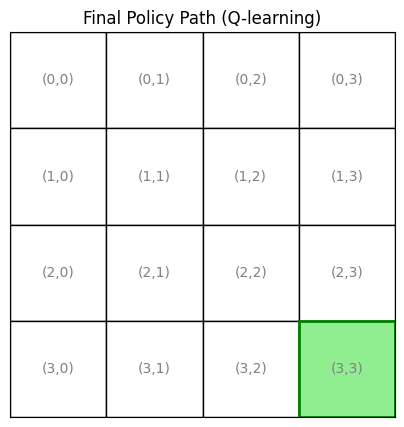

In [71]:
# After training
policy_path = get_policy_path(q_table)
print("Final Policy Path:", policy_path)

# Animate it
anim = animate_path(policy_path)
plt.show()

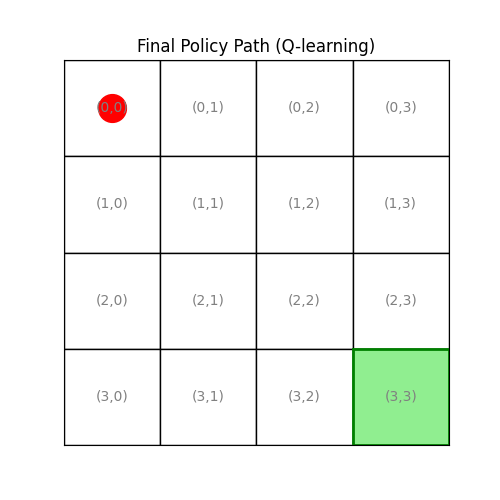

In [72]:
anim.save("Final Policy_Path.gif", writer="pillow")
from IPython.display import Image
Image(filename="Final Policy_Path.gif")

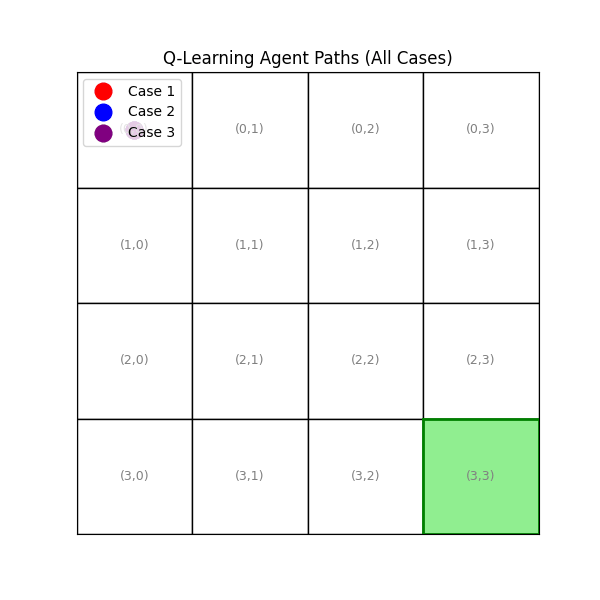

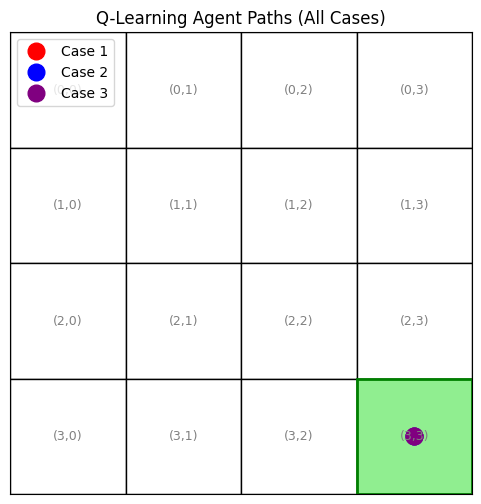

In [74]:
# Install Pillow if needed
!pip install -q pillow

import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# ------------------------
# Define paths for 3 cases
# ------------------------
path_case1 = [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)]
path_case2 = [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3)]
path_case3 = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]

paths = {
    'Case 1': path_case1,
    'Case 2': path_case2,
    'Case 3': path_case3,
}
colors = {
    'Case 1': 'red',
    'Case 2': 'blue',
    'Case 3': 'purple',
}

# ------------------------
# Setup plot
# ------------------------
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title("Q-Learning Agent Paths (All Cases)")

# Draw grid with labels
for i in range(4):
    for j in range(4):
        rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
        ax.add_patch(rect)
        ax.text(j + 0.5, 3.5 - i, f"({i},{j})", ha='center', va='center', fontsize=9, color='gray')

# Mark goal cell
goal = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
ax.add_patch(goal)

# ------------------------
# Create agent circles
# ------------------------
agents = {}
for case in paths:
    agents[case], = ax.plot([], [], 'o', color=colors[case], markersize=12, label=case)

# Add legend
ax.legend(loc='upper left')

# Max frames
max_len = max(len(p) for p in paths.values())

# ------------------------
# Animation update function
# ------------------------
def update(frame):
    for case_name, path in paths.items():
        if frame < len(path):
            x, y = path[frame]
            agents[case_name].set_data([y + 0.5], [3.5 - x])  # ✅ Wrapped in brackets
    return list(agents.values())

# Animate
anim = FuncAnimation(fig, update, frames=max_len, interval=800, blit=True)

# ------------------------
# Save and show as GIF
# ------------------------
gif_path = "/content/all_cases_one_grid.gif"
anim.save(gif_path, writer='pillow')
Image(filename=gif_path)


In [75]:
configs = [
    {'alpha': 0.1, 'gamma': 0.9,  'epsilon_start': 1.0, 'epsilon_end': 0.01, 'decay': 0.995, 'label': 'CASE 1'},
    {'alpha': 0.5, 'gamma': 0.95, 'epsilon_start': 1.0, 'epsilon_end': 0.1,  'decay': 0.995, 'label': 'CASE 2'},
    {'alpha': 0.9, 'gamma': 0.99, 'epsilon_start': 0.5, 'epsilon_end': 0.5,  'decay': 1.0,   'label': 'CASE 3'},  # constant ε
]


In [76]:
all_rewards = {}
all_steps = {}

for cfg in configs:
    alpha = cfg['alpha']
    gamma = cfg['gamma']
    epsilon = cfg['epsilon_start']
    min_epsilon = cfg['epsilon_end']
    decay = cfg['decay']
    label = cfg['label']

    q_table = np.zeros((16, 4))
    rewards_per_episode = []
    steps_to_goal = []

    for episode in range(1000):
        state = env.reset()
        total_reward = 0
        steps = 0

        for step in range(50):
            s_idx = state_to_index(state)
            if np.random.rand() < epsilon:
                action = np.random.randint(4)
            else:
                action = np.argmax(q_table[s_idx])

            next_state, reward, done = env.step(action)
            ns_idx = state_to_index(next_state)

            q_table[s_idx, action] += alpha * (reward + gamma * np.max(q_table[ns_idx]) - q_table[s_idx, action])
            state = next_state

            total_reward += reward
            steps += 1
            if done:
                break

        epsilon = max(min_epsilon, epsilon * decay)
        rewards_per_episode.append(total_reward)
        steps_to_goal.append(steps if reward == 10 else 50)

    all_rewards[label] = rewards_per_episode
    all_steps[label] = steps_to_goal


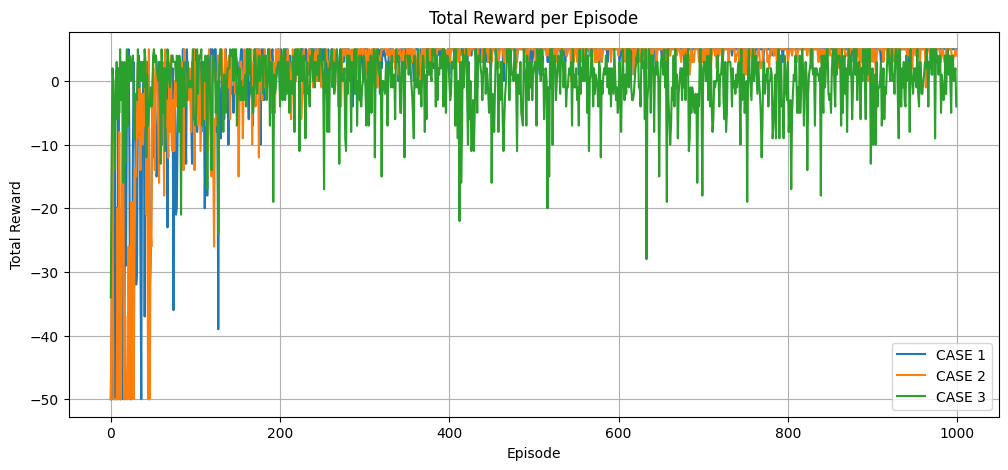

In [77]:
plt.figure(figsize=(12, 5))
for label, rewards in all_rewards.items():
    plt.plot(rewards, label=label)
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid(True)
plt.show()


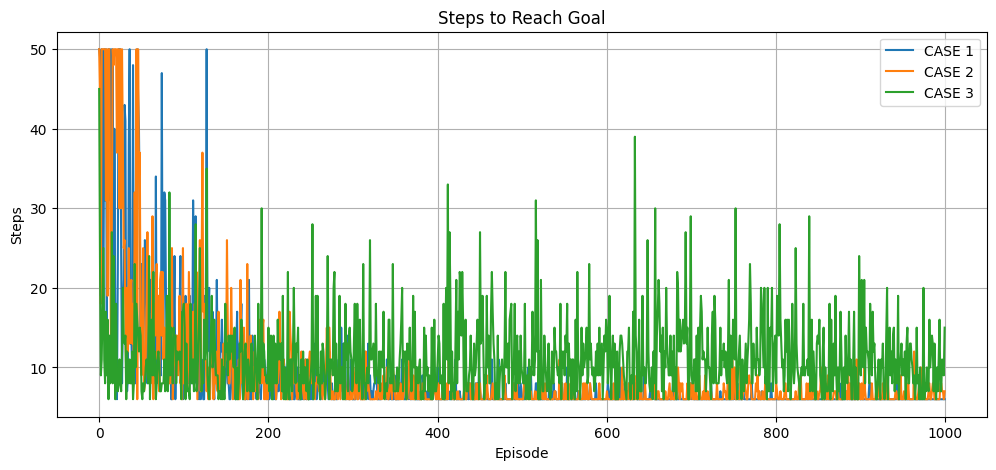

In [78]:
plt.figure(figsize=(12, 5))
for label, steps in all_steps.items():
    plt.plot(steps, label=label)
plt.title("Steps to Reach Goal")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation

In [ ]:
def get_policy_path(q_table, start=(0,0), goal=(3,3), max_steps=50):
    path = [start]
    state = start

    for _ in range(max_steps):
        idx = state[0]*4 + state[1]
        action = np.argmax(q_table[idx])

        x, y = state
        if action == 0:    # up
            x = max(0, x - 1)
        elif action == 1:  # right
            y = min(3, y + 1)
        elif action == 2:  # down
            x = min(3, x + 1)
        elif action == 3:  # left
            y = max(0, y - 1)

        new_state = (x, y)
        path.append(new_state)

        if new_state == goal:
            break

        state = new_state

    return path


In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    ax.grid(True)
    ax.set_title("Agent Path (Q-learning)")

    # Draw the goal
    goal_rect = patches.Rectangle((3, 3), 1, 1, linewidth=1, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # Red dot for the agent
    agent, = ax.plot([], [], 'ro', markersize=18)

    def update(frame):
        x, y = path[frame]
        # ✅ wrap in list so matplotlib doesn't throw
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


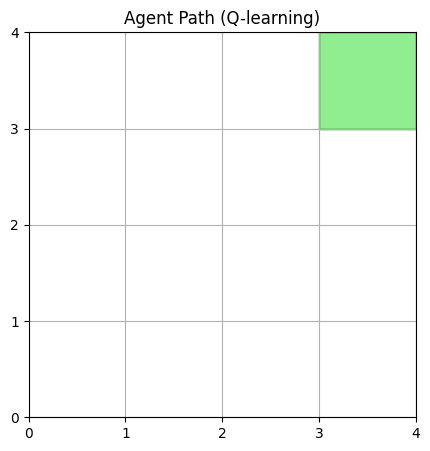

In [ ]:
# Generate path and show animation

path = get_policy_path(q_table)
anim = animate_path(path)  # ✅ keep reference
plt.show()                 # ✅ this displays it in Colab


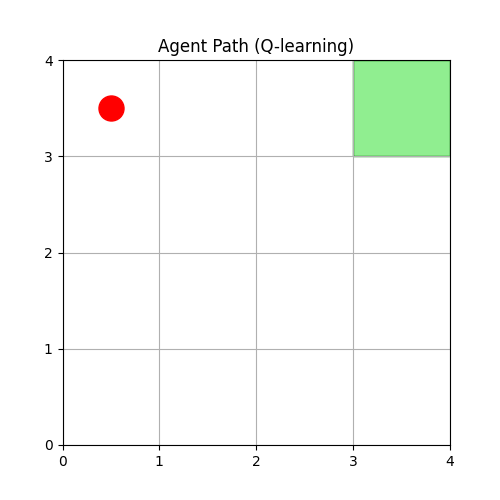

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
print("Agent path:", path)

Agent path: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3)]


In [ ]:
path = get_policy_path(q_table)
print("Agent path:", path)


Agent path: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3)]


In [ ]:
print(q_table)


[[ 2.02602798  3.21342812  0.46194942  1.99929924]
 [ 3.15795318  4.4351875   4.19630951  2.01726098]
 [ 4.41214844  5.60518295  5.72125     3.19701825]
 [-1.4628125   2.1021405   7.07143707 -0.9875    ]
 [-2.14637129 -2.12155469  2.94163235 -2.33541406]
 [-1.92163281  5.72035434 -1.73171875 -2.2504668 ]
 [ 4.39101353  7.075       4.97534935  4.30590515]
 [ 4.38170864  7.05837097  8.5         5.67264648]
 [-1.4628125  -1.409375    5.11637909 -1.4628125 ]
 [-1.60828125  0.3421875  -1.1125     -1.2190625 ]
 [ 0.37354492  8.48888934 -0.5        -0.5       ]
 [ 6.6015625   8.35937468 10.          6.76641204]
 [-1.10625     6.90419312 -0.9875     -0.9875    ]
 [-0.9875      8.47009277 -0.5        -0.5       ]
 [-0.5         9.99755859  0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw all 4x4 grid cells as boxes
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

    # ✅ Highlight goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Agent as red circle
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


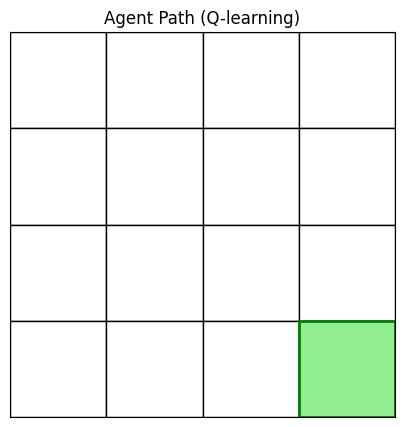

In [ ]:
# Generate path and show animation

path = get_policy_path(q_table)
anim = animate_path(path)  # ✅ keep reference
plt.show()                 # ✅ this displays it in Colab


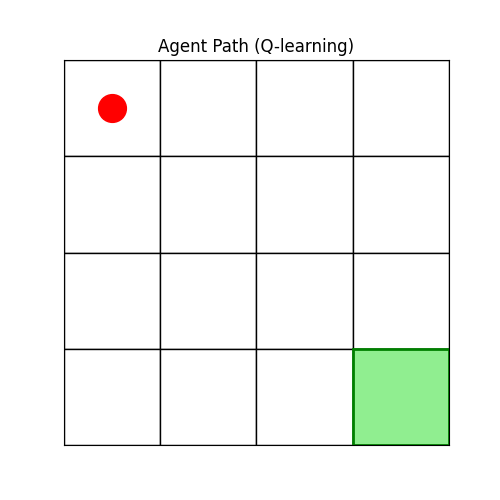

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw all 4x4 grid boxes with coordinate labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            # ✅ Add label in center of each cell
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})",
                    ha='center', va='center', fontsize=10, color='gray')

    # ✅ Draw goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Red circle for agent
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


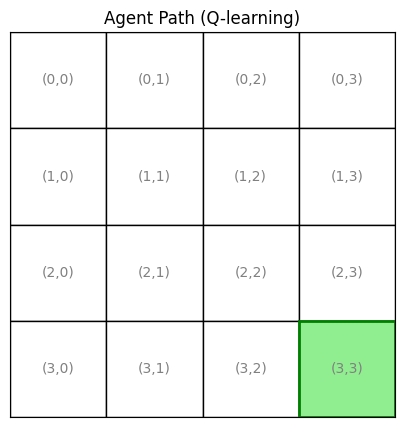

In [ ]:
# Generate path and show animation

path = get_policy_path(q_table)
anim = animate_path(path)  # ✅ keep reference
plt.show()

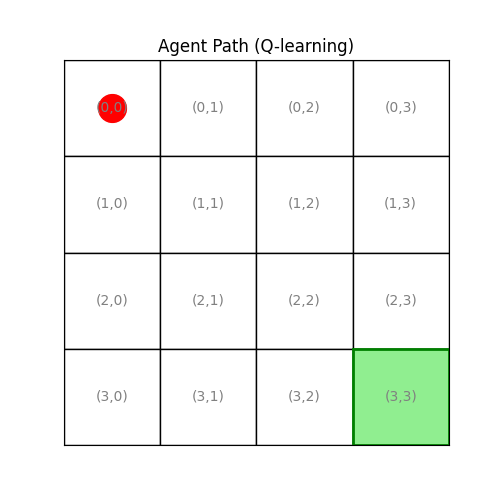

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw grid and coordinates
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})", ha='center', va='center', fontsize=10, color='gray')

    # ✅ Highlight goal cell (3,3) in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # ✅ Add reward label "+10" inside goal box
    ax.text(3.5, 0.5, "+10", ha='center', va='center', fontsize=12, color='green', fontweight='bold')

    # 🔴 Agent as red dot
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim


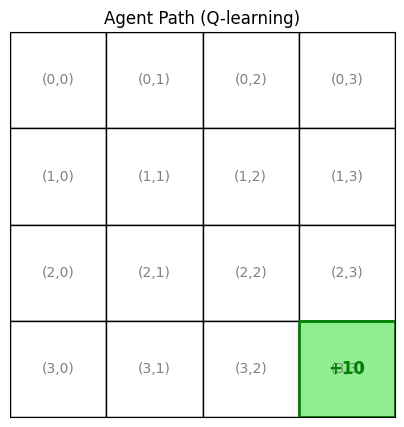

In [ ]:
# Generate path and show animation

path = get_policy_path(q_table)
anim = animate_path(path)  # ✅ keep reference
plt.show()

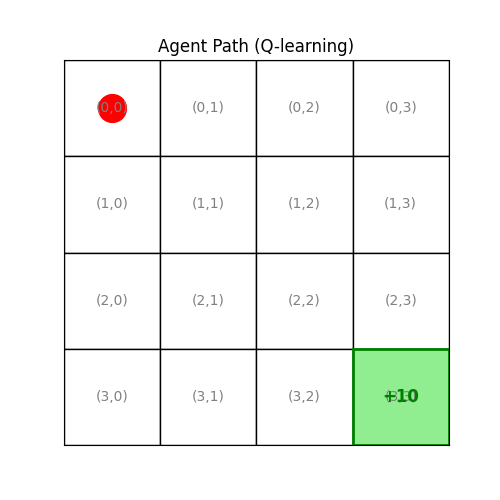

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
# Bad path: loops around before reaching (3,3)
penalty_path = [
    (0, 0), (0, 1), (0, 2), (0, 1),  # backtrack
    (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)
]


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def animate_path(path, penalty_path=None):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path: Optimal (RED) vs Penalty (BLUE)")

    # Draw 4x4 grid and coordinates
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})", ha='center', va='center', fontsize=10, color='gray')

    # Highlight goal cell (3,3)
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)
    ax.text(3.5, 0.5, "+10", ha='center', va='center', fontsize=12, color='green', fontweight='bold')

    # Create agent markers
    agent, = ax.plot([], [], 'ro', markersize=20)     # Red dot for optimal agent
    bad_agent, = ax.plot([], [], 'bo', markersize=15) # Blue dot for bad path

    def update(frame):
        if frame < len(path):
            x, y = path[frame]
            agent.set_data([y + 0.5], [3.5 - x])

        if penalty_path and frame < len(penalty_path):
            x2, y2 = penalty_path[frame]
            bad_agent.set_data([y2 + 0.5], [3.5 - x2])

        return agent, bad_agent

    anim = FuncAnimation(fig, update, frames=max(len(path), len(penalty_path) if penalty_path else 0),
                         interval=500, repeat=False)
    return anim


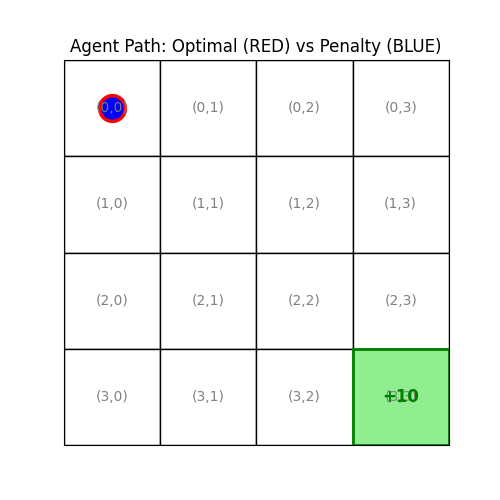

In [ ]:
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path (Q-learning)")

    # ✅ Draw all 4x4 grid boxes with coordinate labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            # ✅ Add label in center of each cell
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})",
                    ha='center', va='center', fontsize=10, color='gray')

    # ✅ Draw goal cell in green
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)

    # 🔴 Red circle for agent
    agent, = ax.plot([], [], 'ro', markersize=20)

    def update(frame):
        x, y = path[frame]
        agent.set_data([y + 0.5], [3.5 - x])
        return agent,

    anim = FuncAnimation(fig, update, frames=len(path), interval=500, repeat=False)
    return anim
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

In [ ]:
def animate_path(path, env, q_table, penalty_path=None):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 5)  # taller to fit text
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_title("Agent Path: Optimal (RED) vs Penalty (BLUE)")

    # Grid + labels
    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})", ha='center', va='center', fontsize=10, color='gray')

    # Goal + +10 label
    goal_rect = patches.Rectangle((3, 0), 1, 1, linewidth=2, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(goal_rect)
    ax.text(3.5, 0.5, "+10", ha='center', va='center', fontsize=12, color='green', fontweight='bold')

    # Agents
    agent, = ax.plot([], [], 'ro', markersize=20)
    bad_agent, = ax.plot([], [], 'bo', markersize=15)

    # Text outputs
    reward_text = ax.text(0.2, 4.5, "", fontsize=12, color='red')
    penalty_text = ax.text(0.2, 4.2, "", fontsize=12, color='blue')

    def update(frame):
        if frame < len(path):
            x, y = path[frame]
            agent.set_data([y + 0.5], [3.5 - x])

            # Reward for optimal agent
            if frame > 0:
                prev = path[frame - 1]
                s = prev[0] * 4 + prev[1]
                a = np.argmax(q_table[s])
                env.reset()  # reset before taking step
                env.agent_pos = list(prev)
                _, reward, _ = env.step(a)
                reward_text.set_text(f"Reward is: {reward}")
            else:
                reward_text.set_text("")

        if penalty_path and frame < len(penalty_path):
            x2, y2 = penalty_path[frame]
            bad_agent.set_data([y2 + 0.5], [3.5 - x2])

            # Penalty for bad agent: always -1 unless goal
            if (x2, y2) == (3, 3):
                penalty_text.set_text("Penalty is: +10")
            else:
                penalty_text.set_text("Penalty is: -1")

        return agent, bad_agent, reward_text, penalty_text

    anim = FuncAnimation(fig, update,
                         frames=max(len(path), len(penalty_path) if penalty_path else 0),
                         interval=600, repeat=False)
    return anim


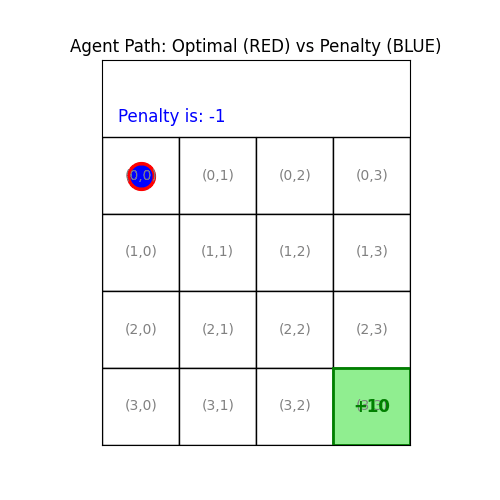

In [ ]:
anim.save("agent_path.gif", writer="pillow")
from IPython.display import Image
Image(filename="agent_path.gif")

✅ Policy path: [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3)]


/tmp/ipython-input-47-2429154630.py:125: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  anim.save("policy_path.gif", writer="pillow")


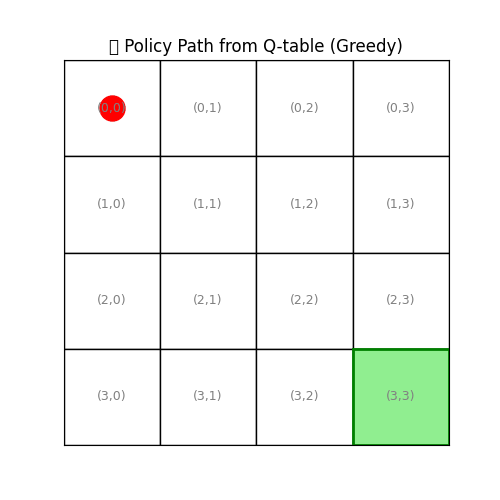

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


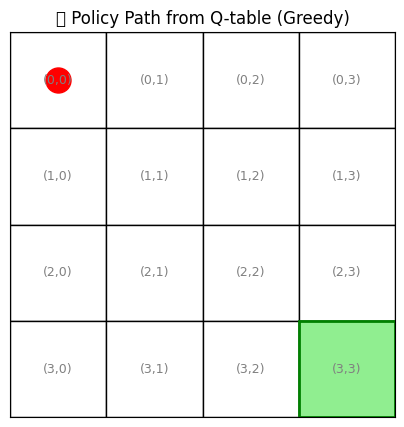

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# ---------- GridWorld Class ----------
class GridWorld:
    def __init__(self):
        self.size = 4
        self.goal = (3, 3)
        self.reset()

    def reset(self):
        self.pos = (0, 0)
        return self.pos

    def step(self, action):
        x, y = self.pos
        if action == 0:    # Up
            x = max(0, x - 1)
        elif action == 1:  # Right
            y = min(self.size - 1, y + 1)
        elif action == 2:  # Down
            x = min(self.size - 1, x + 1)
        elif action == 3:  # Left
            y = max(0, y - 1)

        next_pos = (x, y)
        reward = -1
        done = next_pos == self.goal
        if done:
            reward = 10
        self.pos = next_pos
        return next_pos, reward, done

# ---------- Train Q-learning ----------
env = GridWorld()
q_table = np.zeros((16, 4))  # 16 states (4x4), 4 actions

alpha = 0.1
gamma = 0.9
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.995
episodes = 1000
max_steps = 50

def state_to_index(state):
    return state[0] * 4 + state[1]

for episode in range(episodes):
    state = env.reset()
    for _ in range(max_steps):
        s_idx = state_to_index(state)

        if np.random.rand() < epsilon:
            action = np.random.randint(4)
        else:
            action = np.argmax(q_table[s_idx])

        next_state, reward, done = env.step(action)
        ns_idx = state_to_index(next_state)

        q_table[s_idx, action] += alpha * (reward + gamma * np.max(q_table[ns_idx]) - q_table[s_idx, action])
        state = next_state

        if done:
            break
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

# ---------- Get Policy Path ----------
def get_policy_path(q_table, start=(0,0), goal=(3,3), max_steps=50):
    path = [start]
    state = start
    for _ in range(max_steps):
        idx = state_to_index(state)
        action = np.argmax(q_table[idx])

        x, y = state
        if action == 0: x = max(0, x - 1)       # up
        elif action == 1: y = min(3, y + 1)     # right
        elif action == 2: x = min(3, x + 1)     # down
        elif action == 3: y = max(0, y - 1)     # left

        new_state = (x, y)
        path.append(new_state)
        if new_state == goal:
            break
        state = new_state
    return path

policy_path = get_policy_path(q_table)
print("✅ Policy path:", policy_path)

# ---------- Animate Policy Path ----------
def animate_path(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_aspect('equal')
    ax.set_title("🎯 Policy Path from Q-table (Greedy)")

    for i in range(4):
        for j in range(4):
            rect = patches.Rectangle((j, 3 - i), 1, 1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
            ax.text(j + 0.5, 3.5 - i, f"({i},{j})", ha='center', va='center', fontsize=9, color='gray')

    goal_rect = patches.Rectangle((3, 0), 1, 1, edgecolor='green', facecolor='lightgreen', linewidth=2)
    ax.add_patch(goal_rect)

    agent_dot, = ax.plot([], [], 'ro', markersize=18)

    def update(frame):
        x, y = path[frame]
        agent_dot.set_data([y + 0.5], [3.5 - x])
        return agent_dot,

    anim = FuncAnimation(fig, update, frames=len(path), interval=600, repeat=False)
    return anim

# ---------- Show and Save ----------
anim = animate_path(policy_path)
anim.save("policy_path.gif", writer="pillow")
Image("policy_path.gif")


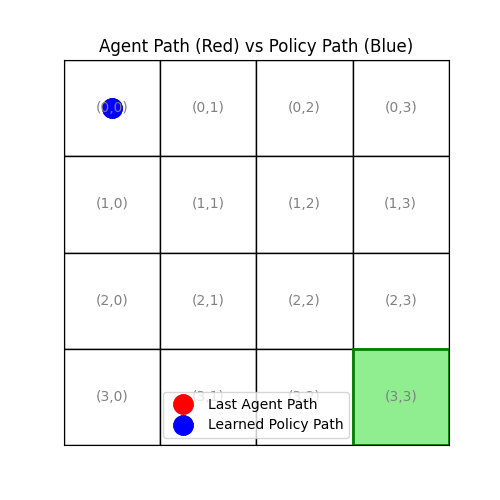

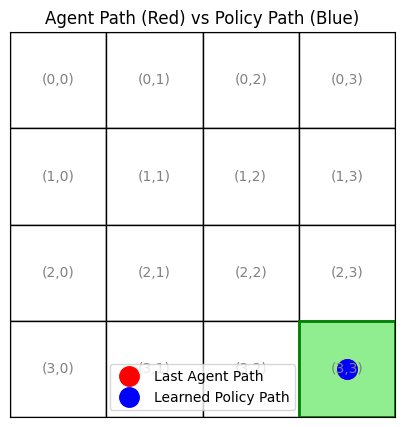

In [ ]:
# ✅ Step 1: Imports
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import Image
import os

# ✅ Step 2: GridWorld Environment
class GridWorld:
    def __init__(self):
        self.size = 4
        self.goal = (3, 3)
        self.reset()

    def reset(self):
        self.pos = (0, 0)
        return self.pos

    def step(self, action):
        x, y = self.pos
        if action == 0: x = max(0, x - 1)      # Up
        elif action == 1: y = min(3, y + 1)    # Right
        elif action == 2: x = min(3, x + 1)    # Down
        elif action == 3: y = max(0, y - 1)    # Left

        new_pos = (x, y)
        reward = 10 if new_pos == self.goal else -1
        done = new_pos == self.goal

        self.pos = new_pos
        return new_pos, reward, done

# ✅ Step 3: Q-Learning Training
env = GridWorld()
q_table = np.zeros((16, 4))
alpha, gamma = 0.1, 0.9
epsilon, min_epsilon, decay = 1.0, 0.01, 0.99
episodes, max_steps = 1000, 50
state_to_index = lambda s: s[0] * 4 + s[1]

last_agent_path = []

for ep in range(episodes):
    state = env.reset()
    episode_path = [state]
    for step in range(max_steps):
        idx = state_to_index(state)
        action = random.randint(0, 3) if random.random() < epsilon else np.argmax(q_table[idx])
        next_state, reward, done = env.step(action)
        nidx = state_to_index(next_state)

        q_table[idx, action] += alpha * (reward + gamma * np.max(q_table[nidx]) - q_table[idx, action])
        state = next_state
        episode_path.append(state)
        if done: break
    epsilon = max(min_epsilon, epsilon * decay)
    last_agent_path = episode_path  # save last episode path

# ✅ Step 4: Get Learned Policy Path
def get_policy_path(q_table, start=(0, 0), goal=(3, 3), max_steps=50):
    path = [start]
    state = start
    for _ in range(max_steps):
        idx = state_to_index(state)
        action = np.argmax(q_table[idx])
        x, y = state
        if action == 0: x = max(0, x - 1)
        elif action == 1: y = min(3, y + 1)
        elif action == 2: x = min(3, x + 1)
        elif action == 3: y = max(0, y - 1)
        new_state = (x, y)
        path.append(new_state)
        if new_state == goal:
            break
        state = new_state
    return path

policy_path = get_policy_path(q_table)

# ✅ Step 5: Animate Both Paths
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_xticks([]), ax.set_yticks([])
ax.set_title("Agent Path (Red) vs Policy Path (Blue)")
ax.set_aspect('equal')

# Draw grid
for i in range(4):
    for j in range(4):
        rect = patches.Rectangle((j, 3 - i), 1, 1, edgecolor='black', facecolor='white', linewidth=1)
        ax.add_patch(rect)
        ax.text(j + 0.5, 3.5 - i, f"({i},{j})", ha='center', va='center', fontsize=10, color='gray')

# Goal Cell
goal = patches.Rectangle((3, 0), 1, 1, edgecolor='green', facecolor='lightgreen', linewidth=2)
ax.add_patch(goal)

# Agent circles
agent_dot, = ax.plot([], [], 'ro', markersize=14, label="Last Agent Path")
policy_dot, = ax.plot([], [], 'bo', markersize=14, label="Learned Policy Path")
ax.legend()

max_frames = max(len(last_agent_path), len(policy_path))

def update(frame):
    if frame < len(last_agent_path):
        x, y = last_agent_path[frame]
        agent_dot.set_data([y + 0.5], [3.5 - x])
    if frame < len(policy_path):
        x2, y2 = policy_path[frame]
        policy_dot.set_data([y2 + 0.5], [3.5 - x2])
    return agent_dot, policy_dot

anim = FuncAnimation(fig, update, frames=max_frames, interval=600, blit=True)

# ✅ Step 6: Save and Display
output_gif = "/content/agent_vs_policy.gif"
anim.save(output_gif, writer="pillow")
Image(output_gif)


In [ ]:
def get_policy_path(q_table, start=(0, 0), goal=(3, 3), max_steps=50):
    path = [start]
    state = start

    for _ in range(max_steps):
        idx = state[0] * 4 + state[1]
        action = np.argmax(q_table[idx])

        x, y = state
        if action == 0:    # Up
            x = max(0, x - 1)
        elif action == 1:  # Right
            y = min(3, y + 1)
        elif action == 2:  # Down
            x = min(3, x + 1)
        elif action == 3:  # Left
            y = max(0, y - 1)

        new_state = (x, y)
        path.append(new_state)

        if new_state == goal:
            break

        state = new_state

    return path


In [ ]:
final_policy_path = get_policy_path(q_table)
print("🧭 Final Policy Path:", final_policy_path)


🧭 Final Policy Path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3)]


In [ ]:
def train_q_learning(alpha, gamma, epsilon, min_epsilon, epsilon_decay, episodes=1000, max_steps=50):
    env = GridWorld()
    q_table = np.zeros((16, 4))

    def state_to_index(state):
        return state[0] * 4 + state[1]

    for episode in range(episodes):
        state = env.reset()
        for step in range(max_steps):
            s_idx = state_to_index(state)
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, 3)
            else:
                action = np.argmax(q_table[s_idx])

            next_state, reward, done = env.step(action)
            ns_idx = state_to_index(next_state)

            q_table[s_idx, action] += alpha * (reward + gamma * np.max(q_table[ns_idx]) - q_table[s_idx, action])
            state = next_state

            if done:
                break
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

    return q_table


In [ ]:
# Case 1
q1 = train_q_learning(alpha=0.1, gamma=0.9, epsilon=1.0, min_epsilon=0.01, epsilon_decay=0.995)

# Case 2
q2 = train_q_learning(alpha=0.5, gamma=0.95, epsilon=1.0, min_epsilon=0.1, epsilon_decay=0.995)

# Case 3 (epsilon constant)
q3 = train_q_learning(alpha=0.9, gamma=0.99, epsilon=0.5, min_epsilon=0.5, epsilon_decay=1.0)
